In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


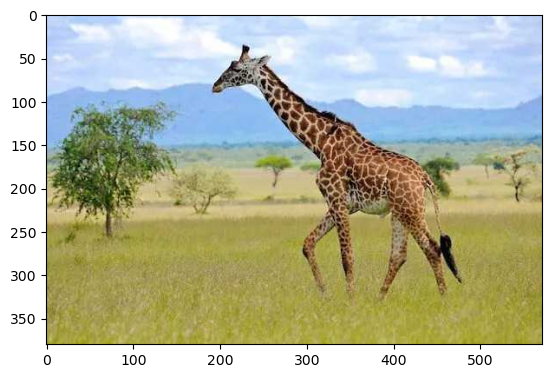

In [3]:
GIRAFFE = cv2.cvtColor(cv2.imread("./lectures/edge_detection/giraffe.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(GIRAFFE)

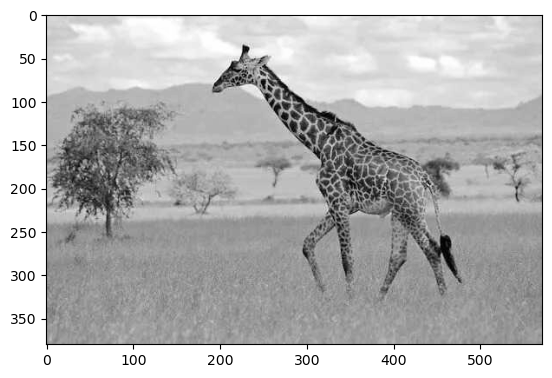

In [4]:
GIRAFFE_GRAYSCALE = cv2.cvtColor(GIRAFFE, cv2.COLOR_RGB2GRAY)
plt.imshow(GIRAFFE_GRAYSCALE, cmap="gray")

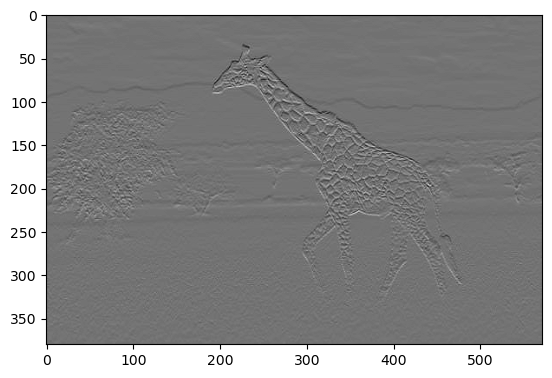

In [5]:
discrete_x_derivative = np.array([-1, 1])
GIRAFFE_X_DERIVATIVE = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=discrete_x_derivative)
plt.imshow(GIRAFFE_X_DERIVATIVE, cmap="gray")

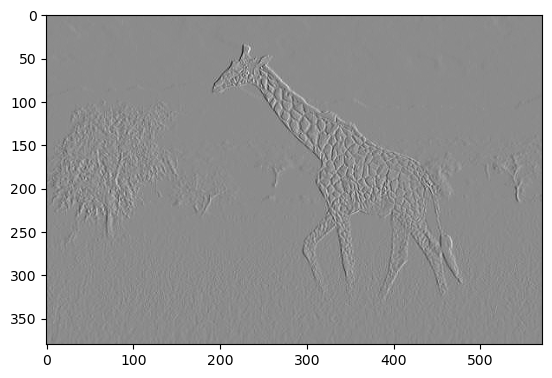

In [6]:
discrete_y_derivative = np.array([[-1, 1]])
GIRAFFE_Y_DERIVATIVE = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=discrete_y_derivative)
plt.imshow(GIRAFFE_Y_DERIVATIVE, cmap="gray")

C:\Users\Aleksander\AppData\Local\Temp\ipykernel_21724\86235469.py:1: RuntimeWarning: invalid value encountered in sqrt
  DERRIVATIVE_STRENGHT = np.sqrt(np.square(GIRAFFE_X_DERIVATIVE) + np.square(GIRAFFE_Y_DERIVATIVE))


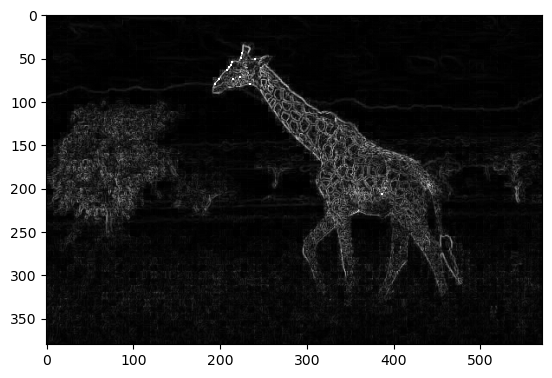

In [7]:
DERRIVATIVE_STRENGHT = np.sqrt(np.square(GIRAFFE_X_DERIVATIVE) + np.square(GIRAFFE_Y_DERIVATIVE))
plt.imshow(DERRIVATIVE_STRENGHT, cmap="gray")

In [8]:
N = 3
O = 5
discrete_x_derivative_blurred = np.convolve(cv2.getGaussianKernel(N-1, O).reshape(-1), discrete_x_derivative)
discrete_y_derivative_blurred = np.convolve(cv2.getGaussianKernel(N-1, O).reshape(-1), discrete_y_derivative.reshape(-1)).reshape(N, 1)

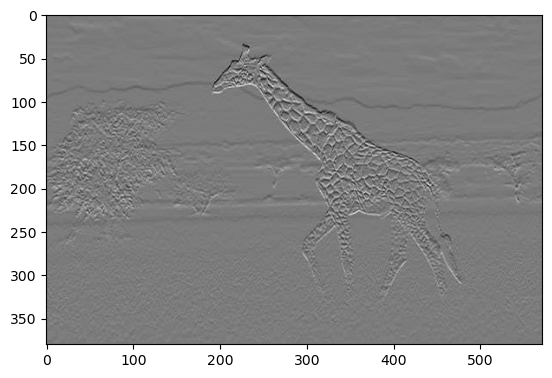

In [9]:
GIRAFFE_X_DERIVATIVE_BLURRED = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=discrete_x_derivative_blurred)
plt.imshow(GIRAFFE_X_DERIVATIVE_BLURRED, cmap="gray")

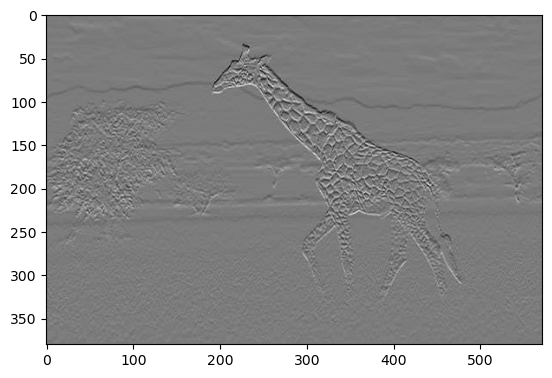

In [10]:
GIRAFFE_Y_DERIVATIVE_BLURRED = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=discrete_y_derivative_blurred)
plt.imshow(GIRAFFE_Y_DERIVATIVE_BLURRED, cmap="gray")

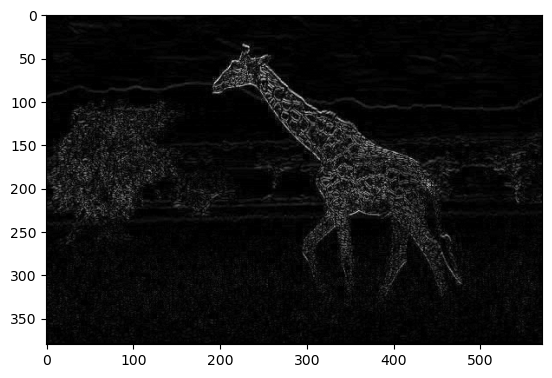

In [11]:
DERRIVATIVE_BLURRED_STRENGHT = np.sqrt(np.square(GIRAFFE_X_DERIVATIVE_BLURRED) + np.square(GIRAFFE_Y_DERIVATIVE_BLURRED))
plt.imshow(DERRIVATIVE_BLURRED_STRENGHT, cmap="gray")

In [12]:
sobel_x_derivative = np.array([ [-1, 0, 1],
                              [-2, 0, 2],
                              [-1, 0, 1] ])
sobel_y_derivative = -np.transpose(sobel_x_derivative)

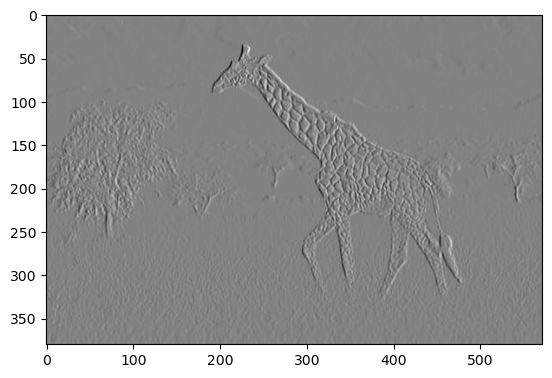

In [13]:
GIRAFFE_BY_SOBEL_X = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=sobel_x_derivative)
plt.imshow(GIRAFFE_BY_SOBEL_X, cmap="gray")

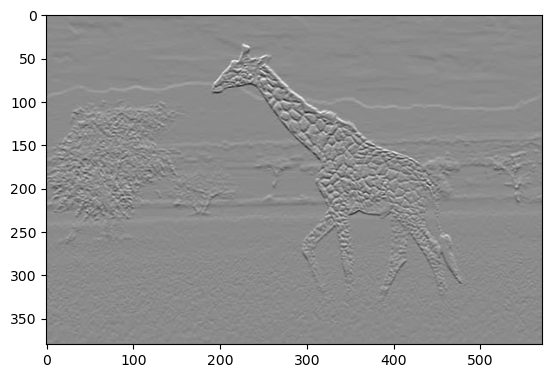

In [14]:
GIRAFFE_BY_SOBEL_Y = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=sobel_y_derivative)
plt.imshow(GIRAFFE_BY_SOBEL_Y, cmap="gray")

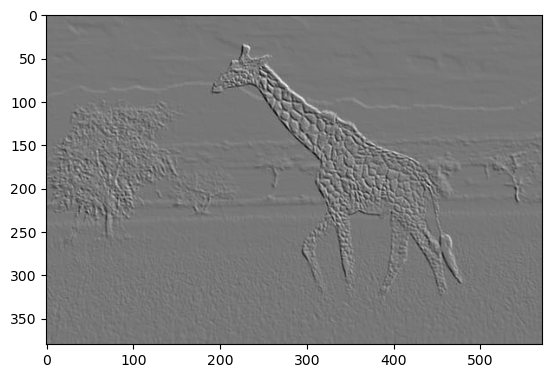

In [15]:
JOINED_SOBEL_GIRAFFE = (GIRAFFE_BY_SOBEL_X + GIRAFFE_BY_SOBEL_Y) / 2
plt.imshow(JOINED_SOBEL_GIRAFFE, cmap="gray")

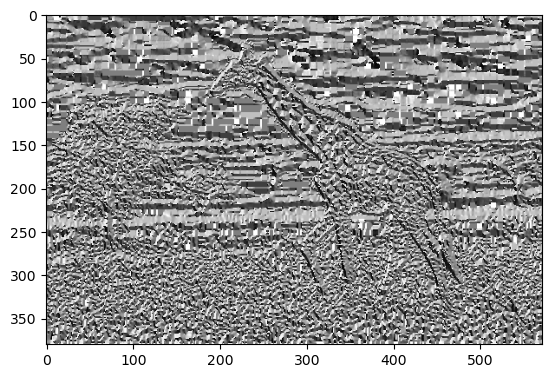

In [16]:
SOBEL_AGNLES = np.arctan2(GIRAFFE_BY_SOBEL_Y, GIRAFFE_BY_SOBEL_X)
plt.imshow(SOBEL_AGNLES, cmap="gray")

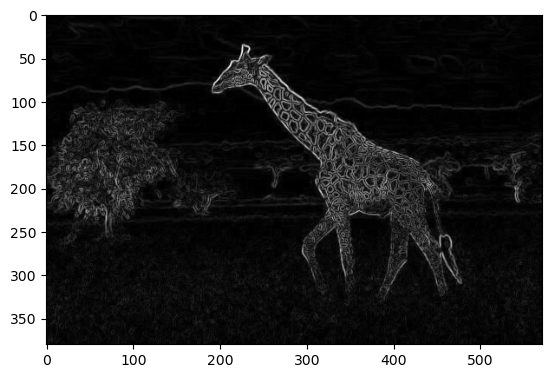

In [17]:
GIRAFFE_BY_SOBEL_X = GIRAFFE_BY_SOBEL_X.astype(np.float64)
GIRAFFE_BY_SOBEL_Y = GIRAFFE_BY_SOBEL_Y.astype(np.float64)
SOBEL_MAGNITUDE = np.sqrt(np.square(GIRAFFE_BY_SOBEL_X) + np.square(GIRAFFE_BY_SOBEL_Y))
plt.imshow(SOBEL_MAGNITUDE, cmap="gray")

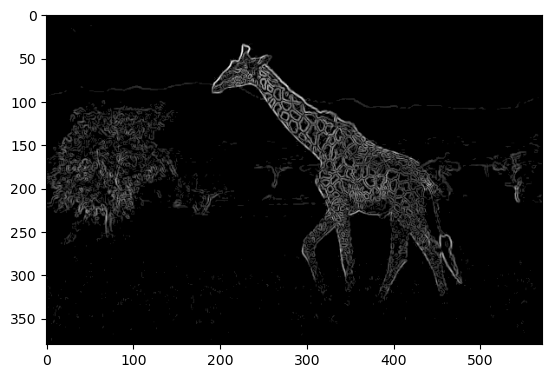

In [18]:
SOBEL_MAGNITUDE_THRESHOLDED = SOBEL_MAGNITUDE.copy()
SOBEL_MAGNITUDE_THRESHOLDED[SOBEL_MAGNITUDE_THRESHOLDED < 100] = 0
plt.imshow(SOBEL_MAGNITUDE_THRESHOLDED, cmap="gray")

In [32]:
LOCAL_MAXIMA = np.zeros_like(GIRAFFE_GRAYSCALE)
ANGLE_SIN = np.sin(SOBEL_AGNLES)
ANGLE_COS = np.cos(SOBEL_AGNLES)
rows, columns = LOCAL_MAXIMA.shape
for x in range(rows):
    for y in range(columns):
        x_change = ANGLE_COS[x, y]
        y_change = ANGLE_SIN[x, y]
        minus_val = cv2.remap(SOBEL_MAGNITUDE_THRESHOLDED, np.array([[x - x_change]], np.float32), np.array([[y - y_change]], np.float32), cv2.INTER_LINEAR)
        plus_val = cv2.remap(SOBEL_MAGNITUDE_THRESHOLDED, np.array([[x + x_change]], np.float32), np.array([[y + y_change]], np.float32), cv2.INTER_LINEAR)
        val = SOBEL_MAGNITUDE_THRESHOLDED[x, y]
        
        if minus_val < val < plus_val or plus_val < val < minus_val:
            LOCAL_MAXIMA[x, y] = 1


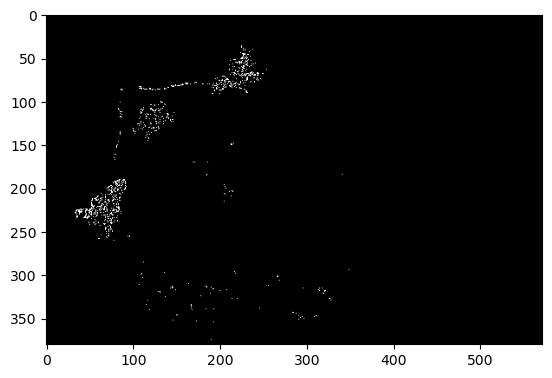

In [33]:
plt.imshow(LOCAL_MAXIMA, cmap="gray")